##### Student Name - Aditya Murali
##### Github Link - https://github.com/adityamurali

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime
%matplotlib inline

###### 1. LOAD IN ALL STOCK TICKERS AS VARIABLES WITH THE TICKER SYMBOL AS THEIR VARIABLE NAME, INCLUDING THE ALL STOCK CSV FILE. 

Update working directory to the location where data sets are stored

In [2]:
os.chdir('/Users/Aditya/Desktop')

Load all stock files into Python

In [3]:
AABA = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

AAPL = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')

AXP = pd.read_csv('AXP_2006-01-01_to_2018-01-01.csv')

BA = pd.read_csv('BA_2006-01-01_to_2018-01-01.csv')

CAT = pd.read_csv('CAT_2006-01-01_to_2018-01-01.csv')

CSCO = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')

CVX = pd.read_csv('CVX_2006-01-01_to_2018-01-01.csv')

DIS = pd.read_csv('DIS_2006-01-01_to_2018-01-01.csv')

GE = pd.read_csv('GE_2006-01-01_to_2018-01-01.csv')

GOOGL = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')

GS = pd.read_csv('GS_2006-01-01_to_2018-01-01.csv')

HD = pd.read_csv('HD_2006-01-01_to_2018-01-01.csv')

IBM = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')

INTC = pd.read_csv('INTC_2006-01-01_to_2018-01-01.csv')

JNJ = pd.read_csv('JNJ_2006-01-01_to_2018-01-01.csv')

JPM = pd.read_csv('JPM_2006-01-01_to_2018-01-01.csv')

KO = pd.read_csv('KO_2006-01-01_to_2018-01-01.csv')

MCD = pd.read_csv('MCD_2006-01-01_to_2018-01-01.csv')

MMM = pd.read_csv('MMM_2006-01-01_to_2018-01-01.csv')

MRK = pd.read_csv('MRK_2006-01-01_to_2018-01-01.csv')

MSFT = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')

NKE = pd.read_csv('NKE_2006-01-01_to_2018-01-01.csv')

PFE = pd.read_csv('PFE_2006-01-01_to_2018-01-01.csv')

PG = pd.read_csv('PG_2006-01-01_to_2018-01-01.csv')

TRV = pd.read_csv('TRV_2006-01-01_to_2018-01-01.csv')

UNH = pd.read_csv('UNH_2006-01-01_to_2018-01-01.csv')

UTX = pd.read_csv('UTX_2006-01-01_to_2018-01-01.csv')

VZ = pd.read_csv('VZ_2006-01-01_to_2018-01-01.csv')

WMT = pd.read_csv('WMT_2006-01-01_to_2018-01-01.csv')

XOM = pd.read_csv('XOM_2006-01-01_to_2018-01-01.csv')

AllStocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

#####  2. PERFORM EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION FOR DIFFERENT TIME PERIODS USING GIVEN STOCK DATASET.

##### Line Chart - Through this chart I can see how a numerical variable (Close value of the Microsoft stock) varies over 12 years

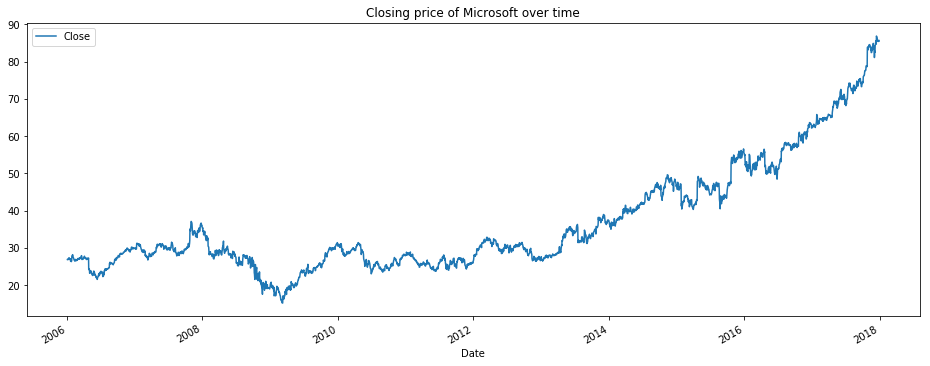

In [4]:
#Convert 'Date' to Datetime format
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

#Set the Date as the index of the dataframe
df = MSFT.set_index('Date')

#Plot a line chart to see variation in Close value over time for Microsoft
df['Close'].plot(legend = True, figsize = (16,6), title = 'Closing price of Microsoft over time')

##### Box Plot - This plot is used to easily detect outliers. 
##### I will look at the volume of Google shares sold in 2010 to see if there are any outliers.

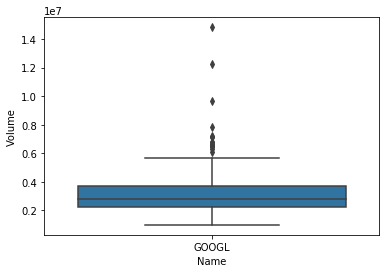

In [5]:
#Convert 'Date' to Datetime format
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

##Set the Date as the index of the dataframe
df2 = GOOGL.set_index('Date')

#Select records from the year 2010
df2 = df2[df2.index > '2010-01-01']
df3 = df2[df2.index < '2010-12-31']

#Create a box plot to see if there were outliers in the daily Volume of Google share transactions in 2010 
sns.boxplot(data = df3[['Volume','Name']], x = 'Name', y = 'Volume')

It can clearly be seen from the above box plot that there are many outliers that lie above the upper whisker(3rd Quartile + 1.5IQR).

Let us now count how many such outliers were present.

In [6]:
#Calculate the Inter Quartile Range
IQR = df3['Volume'].describe()[6] - df3['Volume'].describe()[4]

#Calculate the upper whisker limit
upperwhisker = df3['Volume'].describe()[6] + 1.5*IQR

#Extract and display the outliers
a = len(df3[df3['Volume'] > upperwhisker])
print('There are {} outliers in the Volume of shares sold by Google in 2010'.format(a))

There are 15 outliers in the Volume of shares sold by Google in 2010


##### Histogram Distribution - Through the histogram we can see the distribution of a continuous variable. 
##### I will look at the end of day return (Close - Open) performance of Apple in 2008.

C:\Users\Aditya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


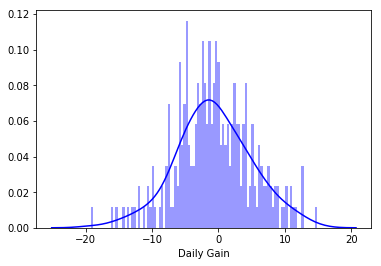

In [7]:
#Convert 'Date' to Datetime format
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

##Set the Date as the index of the dataframe
df4 = GOOGL.set_index('Date')

#Daily gain/return = Close - Open
df4['Daily Gain'] = df4['Close'] - df4['Open']

#Select records from the year 2008
df4 = df4[df4.index > '2008-01-01']
df4a = df4[df4.index < '2008-12-31'] 

#Create a distribution plot to visualize end of day returns for Apple in 2008
sns.distplot(df4a['Daily Gain'],color='blue',bins=100)

##### Scatter Plot - Through this plot we can see if there is a correlation between any two variables. 
##### Apple and Microsoft are rivals in the tech industry. Let us see if there is any clear correlation trend between their Daily Gain (Close - Open) in 2017.

The correlation between the daily gain of Apple and Microsoft is 0.453408053297525. Hence it is not a very strong correlation


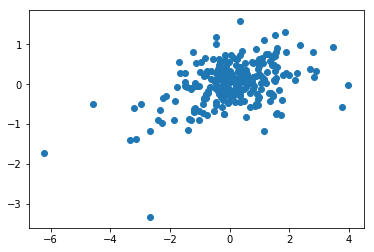

In [8]:
#Convert 'Date' to Datetime format
df5 = AAPL.set_index('Date')
df6 = MSFT.set_index('Date')

##Calculate Daily Gain
df5['Daily Gain'] = df5['Close'] - df5['Open']
df6['Daily Gain'] = df6['Close'] - df6['Open']

#Select records for the year 2017
df5 = df5[df5.index > '2017-01-01']
df6 = df6[df6.index > '2017-01-01']

#Create a scatter plot to visualize end of day returns for Apple in 2017
plt.scatter(df5['Daily Gain'],df6['Daily Gain'])

#Display the numerical coefficient of correlation
c = np.corrcoef(df5['Daily Gain'],df6['Daily Gain'])[0][1]
print('The correlation between the daily gain of Apple and Microsoft is {}'.format(c)+'. Hence it is not a very strong correlation') 

##### Worst performance over lifetime for all stocks

In [9]:
#Convert 'Date' to Datetime format
AllStocks['Date'] = pd.to_datetime(AllStocks['Date'])

#Group records based on stock name and find the minimum 'Low' obtained over all the years
x = AllStocks[['Name','Low']].groupby('Name')[['Low']].min()
y = AllStocks

#Merge the created datframe with the original one, to filter out rows that don't correspond to the minimums
z = pd.merge(x,y, on = 'Name')
w = z[z['Low_x'] == z['Low_y']]
worst = w.set_index('Name')

#Display the worst 'Low' over all the years for all stocks
worst[['Date','Low_x']]

,Date,Low_x
Name,,
AABA,2008-11-20,8.94
AAPL,2006-07-14,7.17
AMZN,2006-08-11,25.76
AXP,2009-03-06,9.71
BA,2009-03-03,29.05
CAT,2009-03-03,21.71
CSCO,2008-09-19,11.78
CVX,2006-03-10,53.76
DIS,2009-03-10,15.14


##### Joint Plot - This plot displays a bivaritate relationship (In this case Volume vs Close for Google) along with the respective univariate distributions

C:\Users\Aditya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aditya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


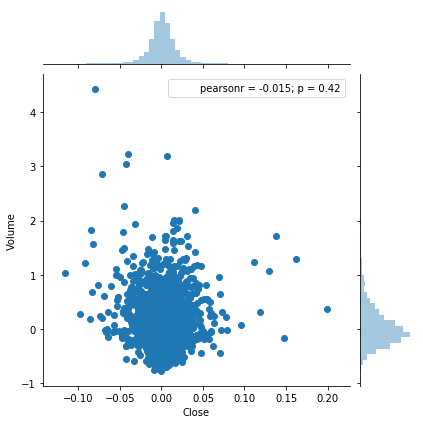

In [10]:
#Create a new dataframe to store the values for previous day percentage change in Close
prevdayreturn = pd.DataFrame()

#Calculate the percentage change with respect to previous day's Close and Volume for Google 
prevdayreturn['Close'] = GOOGL['Close'].pct_change()
prevdayreturn['Volume'] = GOOGL['Volume'].pct_change()
prevdayreturn['Date'] = GOOGL['Date']

#As the first day would not have a previous record, prevdayreturn can't be calculated for it. Hence we ignore the first record
prevdayreturn = prevdayreturn[1:]

sns.jointplot(x='Close',y='Volume',data= prevdayreturn,kind='scatter')

##### Linear Regression Plot - This plot estimates a best fit line that can represent all data points with the least sum of squared errors. 

<Figure size 432x288 with 0 Axes>

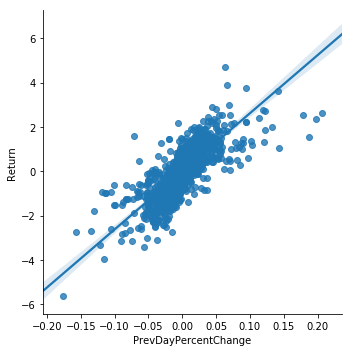

In [11]:
#Convert 'Date' to Datetime format
AXP['Date'] = pd.to_datetime(AXP['Date'])

#Calculate the percentage change with respect to previous day's Close for American Express 
AXP['PrevDayPercentChange'] = AXP['Close'].pct_change()

#Calculate the daily return(Close value - Open value)
AXP['Return']  = AXP['Close'] - AXP['Open']

#Set 'Date' as the index of the dataframe
df16a = AXP.set_index('Date')

#Display the linear model plot
plt.figure()
sns.lmplot(x='PrevDayPercentChange',y='Return',data= df16a)

##### 3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

In [12]:
IBM['Date'] = pd.to_datetime(IBM['Date'])

##### Descriptive statistical measures of IBM stock data

In [13]:
IBM.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


##### What is the max and min Close value for IBM?

In [14]:
mx = IBM['Close'].max()
mn = IBM['Close'].min()
print('The maximum Close value for IBM is {} and the minimum Close value is {}'.format(mx,mn))

The maximum Close value for IBM is 215.8 and the minimum Close value is 71.74


##### On what date did IBM achieve its highest Close value?

In [15]:
IBM[IBM['Close'] == IBM['Close'].max()][['Date','Close']]

,Date,Close
1810,2013-03-14,215.8


##### Variation in closing price of IBM over time?

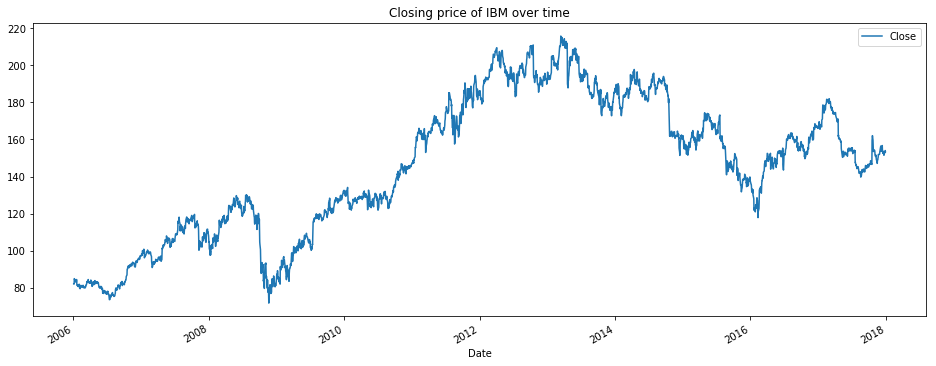

In [16]:
#Set 'Date' as the index of the dataframe
df11 = IBM.set_index('Date')

#Display the variation in Close price of IBM using a line plot
df11['Close'].plot(legend = True, figsize = (16,6), title = 'Closing price of IBM over time')

There are two noticeable sharp drops in the stock price of IBM. One in 2009 during the recession and the other in 2016.

##### What is the percentage of trading days when the stock price of IBM went up?

In [17]:
#Each day the closing price can be greater than, lower than or equal to the opening price
IBM['Return'] = IBM['Close'] - IBM['Open']

#On how many days is closing price greater than opening price
a = IBM[IBM['Return'] >0].count()[0]

#Total number of transaction days for the IBM stock
t = len(IBM)

#Percentage of days when stock went up
a/t*100

53.24503311258278

##### What is the highest single day absolute gain achieved by the IBM stock?

In [18]:
IBM[IBM['Return'] == IBM['Return'].max()]

,Date,Open,High,Low,Close,Volume,Name,Return
516,2008-01-23,99.63,106.34,98.50,106.10,19588039,IBM,6.47
1395,2011-07-19,178.74,185.21,178.65,185.21,13248767,IBM,6.47


##### Variation in volume of IBM shares traded over time

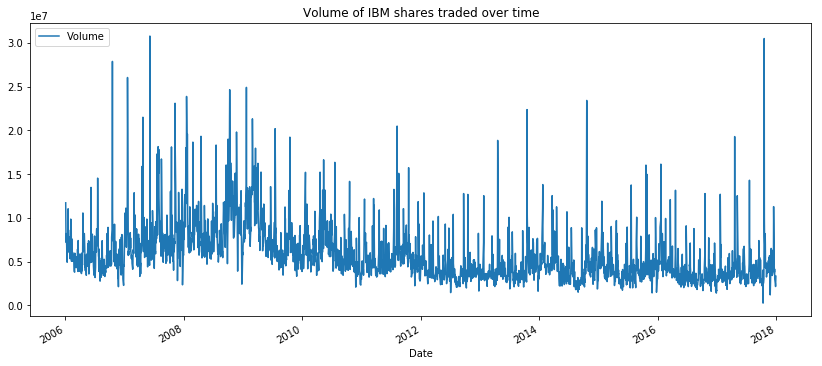

In [19]:
df11['Volume'].plot(legend = True, figsize = (14,6), title = 'Volume of IBM shares traded over time')

We notice many peaks in the Volume of shares transacted. The two highest peaks are observed above the threshold of 3 * 1e7. 

As shown below, it is interesting to note that despite one of the days having a peak in terms of number of transactions, the Close price on that day was actually lower than the Open price, indicating that the stock did not do well on that day.

In [20]:
df11[df11['Volume'] > 3 * 1e7]

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2007-06-06,105.84,105.51,102.39,102.41,30774276,IBM
2017-10-18,157.12,161.23,156.95,159.53,30490192,IBM


###### Variation in daily return of IBM stock over time

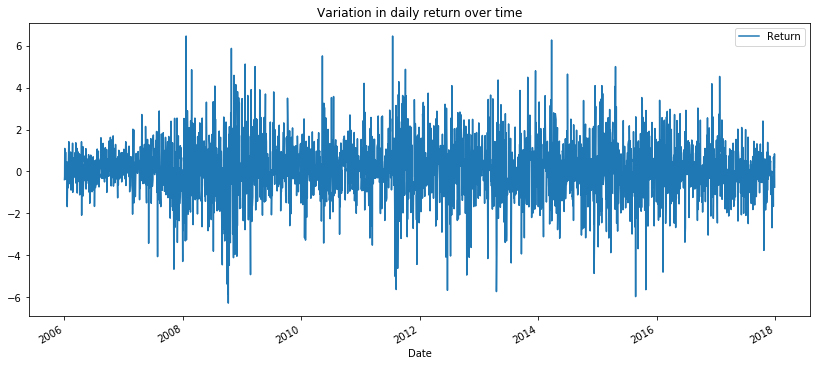

In [21]:
#Set 'Date' as the index of the dataframe
df13 = IBM.set_index('Date')

#Display the variation in daily return of IBM over time
df13['Return'].plot(legend = True, figsize = (14,6), title = 'Variation in daily return over time')

Again many peaks are noticed, indicating volatility. Let us set a threshold of 6 and look at stock details on those days.

In [22]:
df13[df13['Return'] > 6]

,Open,High,Low,Close,Volume,Name,Return
Date,,,,,,,
2008-01-23,99.63,106.34,98.50,106.10,19588039,IBM,6.47
2011-07-19,178.74,185.21,178.65,185.21,13248767,IBM,6.47
2014-03-25,188.76,195.40,188.70,195.04,10912699,IBM,6.28


##### 10 day, 20 day and 30 day Moving Averages

In [23]:
#Set 'Date' as the index of the dataframe
df14 = IBM.set_index('Date')

#Calculate 10,20 and 30 day moving averages of the IBM dataframe
df14['10 day Moving Avg'] = df14['Close'].rolling(window = 10).mean()
df14['20 day Moving Avg'] = df14['Close'].rolling(window = 20).mean()
df14['30 day Moving Avg'] = df14['Close'].rolling(window = 30).mean()

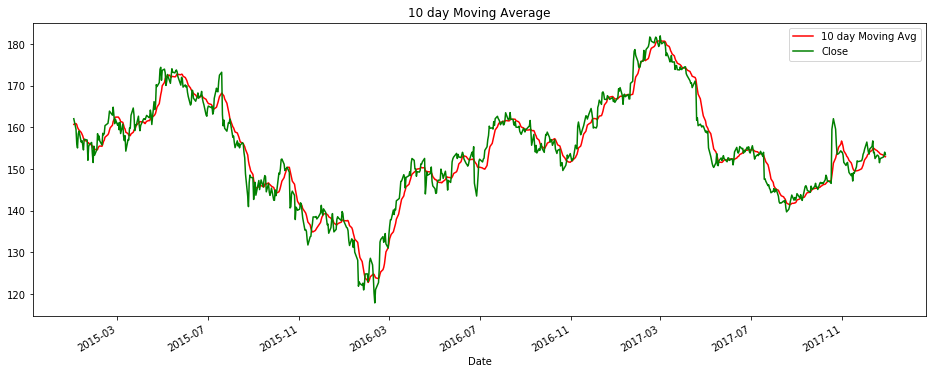

In [24]:
#Select records that lie beyond 1st Jan 2015 and plot the 10 day moving average
df15 = df14[df14.index > '2015-01-01']
df15[['10 day Moving Avg','Close']].plot(legend = True, figsize = (16,6), title = '10 day Moving Average', color = ['r','g'])

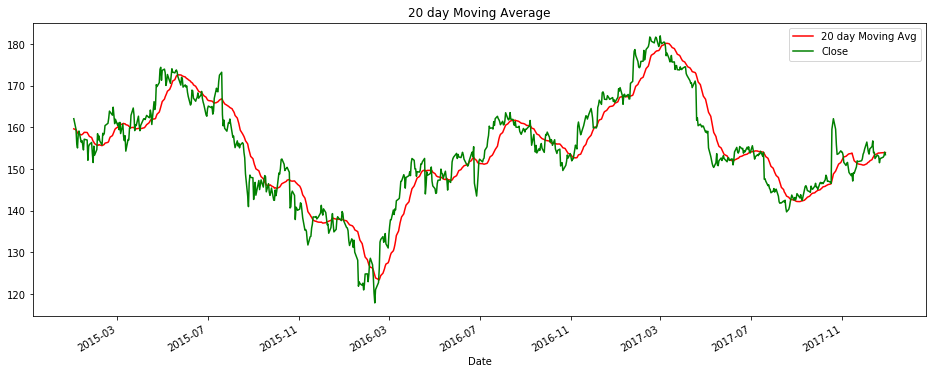

In [25]:
#Plot the 20 day moving average
df15[['20 day Moving Avg','Close']].plot(legend = True, figsize = (16,6), title = '20 day Moving Average', color = ['r','g'])

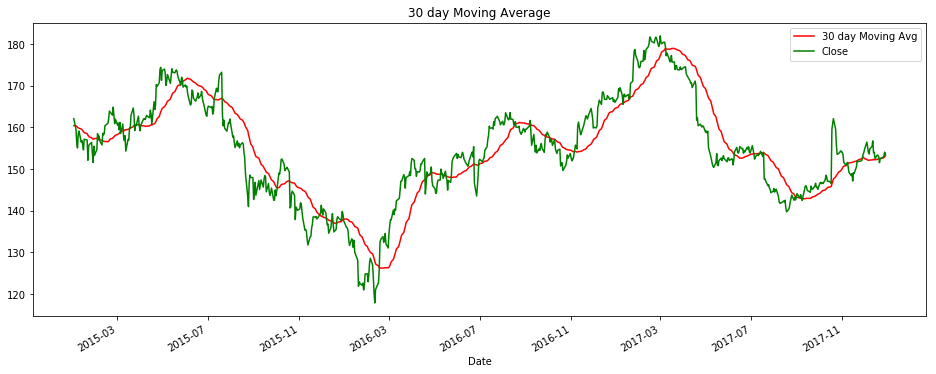

In [26]:
#Plot the 30 day moving average
df15[['30 day Moving Avg','Close']].plot(legend = True, figsize = (16,6), title = '30 day Moving Average', color = ['r','g'])

##### Compare descriptive analysis of two stocks (IBM vs CISCO)

In [27]:
#Convert 'Date' to datetime format
CSCO['Date'] = pd.to_datetime(CSCO['Date'])

In [28]:
#Set 'Date' as the index of the dataframe
df16 = CSCO.set_index('Date')

#Merge the descriptive parameters of the two stocks into one dataframe
df17 = pd.merge(df11,df16, on = 'Date')

In [29]:
#Describe only the statistics of Close value
df17a = df17[['Close_x','Close_y']]
df17a.describe()

,Close_x,Close_y
count,3019.000000,3019.000000
mean,145.623031,24.039632
std,37.534272,5.034167
min,71.740000,13.620000
25%,116.520000,20.105000
50%,149.330000,23.890000
75%,178.690000,27.545000
max,215.800000,38.740000


It can be seen that the first stick stock(IBM) has much higher descriptive statistical measures than the second stock (Cisco).

##### Maximum and Minimum value of Close for IBM and CISCO

In [30]:
mx1 = CSCO['Close'].max()
mn1 = CSCO['Close'].min()
print('The maximum Close value for CSCO is {} and the minimum Close value is {}'.format(mx1,mn1))

print('The maximum Close value for IBM is {} and the minimum Close value is {}'.format(mx,mn))

The maximum Close value for CSCO is 38.74 and the minimum Close value is 13.62
The maximum Close value for IBM is 215.8 and the minimum Close value is 71.74


##### On what date did CISCO achieve its highest Close value?

In [31]:
CSCO[CSCO['Close'] == CSCO['Close'].max()][['Date','Close']]

,Date,Close
3012,2017-12-20,38.74


Here, we can see that Cisco reached its highest value in 2017, whereas previously we have seen that IBM reached its highest value in 2013.

##### Compare variation in closing price of IBM and CISCO over time?

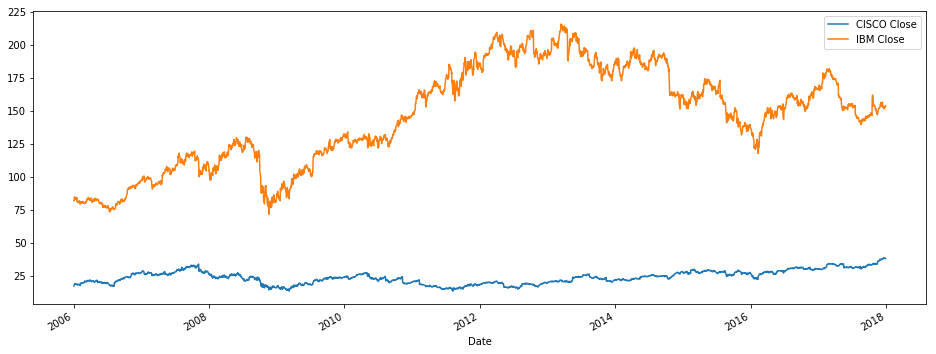

In [32]:
fig = plt.figure()
df16['Close'].plot(label = 'CISCO Close', figsize = (16,6))
df11['Close'].plot(label = 'IBM Close' , figsize = (16,6))
plt.legend()




Although the Close value for IBM is always much higher than CISCO, we can see that it is a much more volatile stock.

##### What is the percentage of trading days when the stock price of CISCO went up?

In [33]:
#Each day the closing price can be greater than, lower than or equal to the opening price
CSCO['Return'] = CSCO['Close'] - CSCO['Open']

#On how many days is closing price greater than opening price
a = CSCO[CSCO['Return'] >0].count()[0]

#Total number of transaction days for the IBM stock
t = len(CSCO)

#Percentage of days when stock went up
a/t*100

51.40775091089764

Hence, on 51.4% of trading days the Close value is higher than the Open value for CISCO. This is marginally lower than that of IBM (53%) that we calculated earlier.

##### What is the highest single day absolute gain achieved by the CSCO stock?

In [34]:
CSCO[CSCO['Return'] == CSCO['Return'].max()]

,Date,Open,High,Low,Close,Volume,Name,Return
710,2008-10-28,16.76,18.35,16.45,18.31,88697815,CSCO,1.55


We can see that the highest single day gain is 1.55 for CISCO. This is much lower than that of IBM whose maximum single day gain was 6.47. This correlates with the earlier finding that IBM was a much more volatile stock than CISCO.

##### Variation in volume of shares traded over time - CISCO vs IBM

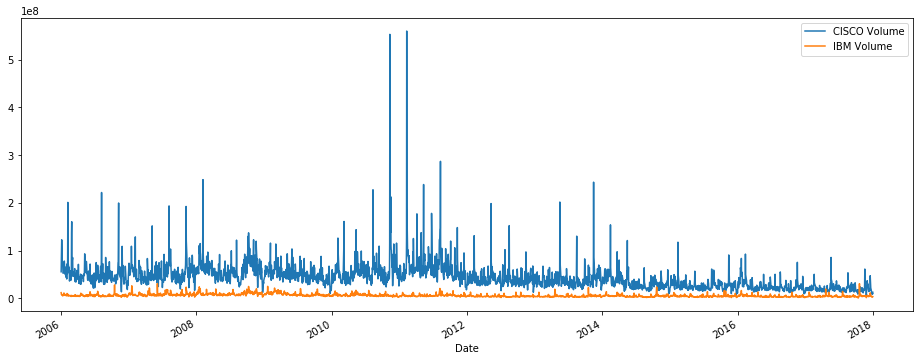

In [35]:
fig = plt.figure()
df16['Volume'].plot(label = 'CISCO Volume', figsize = (16,6))
df11['Volume'].plot(label = 'IBM Volume' , figsize = (16,6))
plt.legend()

We can see that of volume of shares traded for CISCO is much higher than IBM. This could also be because the stock price is much lower than IBM. More people can afford to buy this stock and hence we see the greater number of transactions for CISCO.

##### Variation in daily return of CISCO stock over time

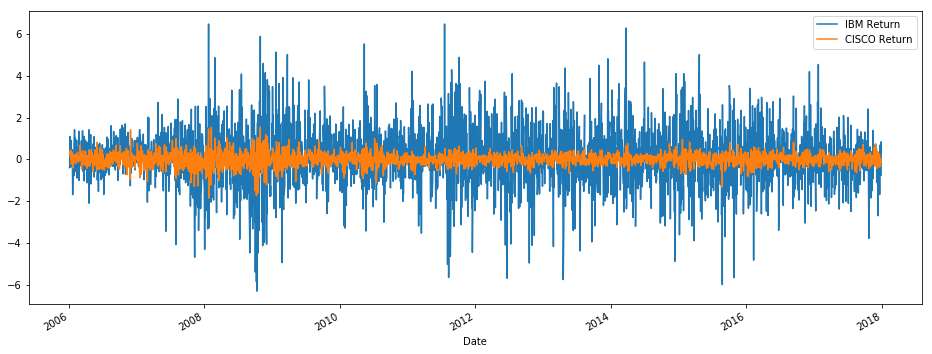

In [36]:
df17 = IBM.set_index('Date')
df18 = CSCO.set_index('Date')
fig = plt.figure()
df17['Return'].plot(label = 'IBM Return', figsize = (16,6))
df18['Return'].plot(label = 'CISCO Return' , figsize = (16,6))
plt.legend()

The returns are greater and more volatile in IBM when compared to CISCO. Hence, it appears that IBM would be a more risky stock to have in a portfolio (high risk = High reward).

##### 10 day, 20 day and 30 day moving averages

In [37]:
df16['10 day Moving Avg'] = df16['Close'].rolling(window = 10).mean()
df16['20 day Moving Avg'] = df16['Close'].rolling(window = 20).mean()
df16['30 day Moving Avg'] = df16['Close'].rolling(window = 30).mean()

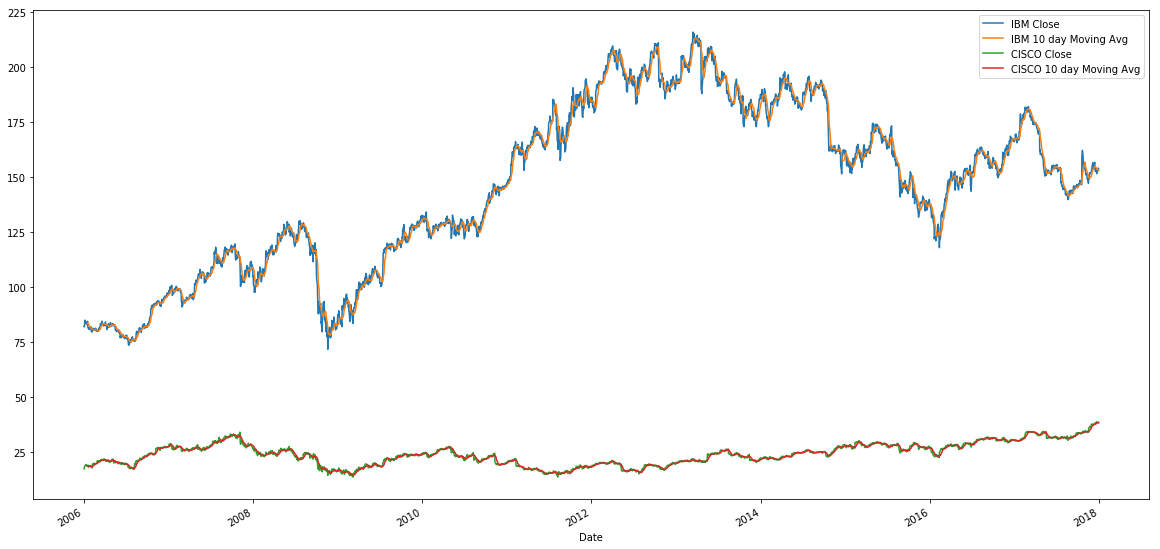

In [38]:
fig = plt.figure()
df14['Close'].plot(label = 'IBM Close', figsize = (20,10))
df14['10 day Moving Avg'].plot(label = 'IBM 10 day Moving Avg', figsize = (20,10))
df16['Close'].plot(label = 'CISCO Close', figsize = (20,10))
df16['10 day Moving Avg'].plot(label = 'CISCO 10 day Moving Avg' , figsize = (20,10))
plt.legend()

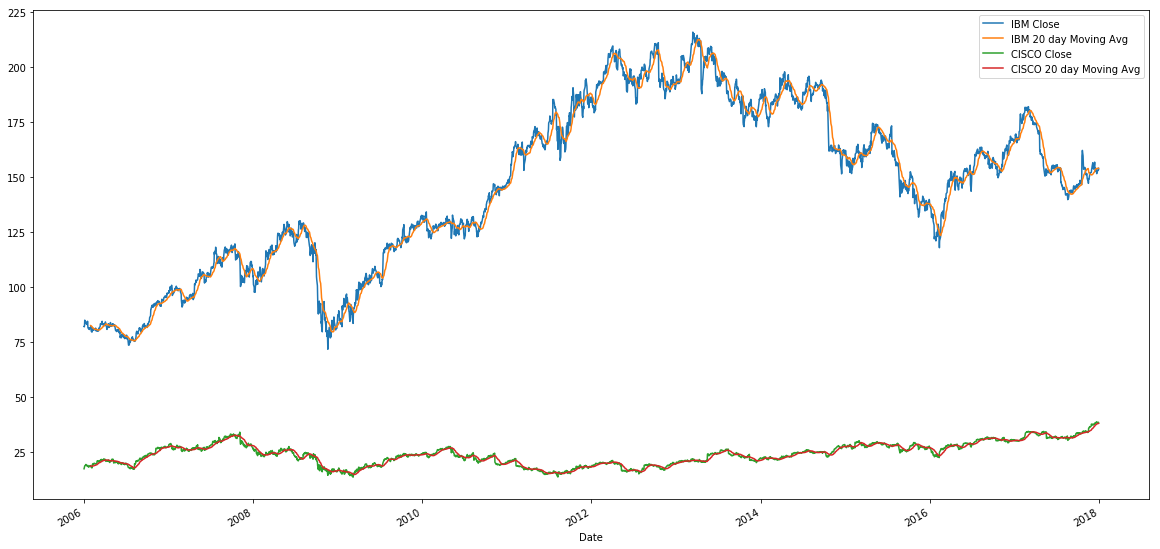

In [39]:
fig = plt.figure()
df14['Close'].plot(label = 'IBM Close', figsize = (20,10))
df14['20 day Moving Avg'].plot(label = 'IBM 20 day Moving Avg', figsize = (20,10))
df16['Close'].plot(label = 'CISCO Close', figsize = (20,10))
df16['20 day Moving Avg'].plot(label = 'CISCO 20 day Moving Avg' , figsize = (20,10))
plt.legend()

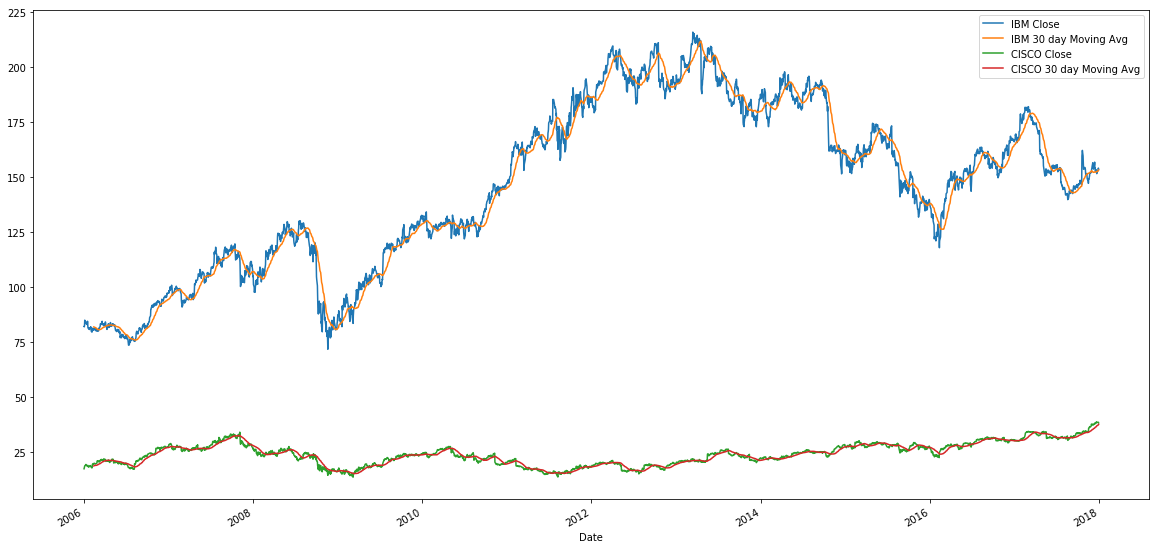

In [40]:
fig = plt.figure()
df14['Close'].plot(label = 'IBM Close', figsize = (20,10))
df14['30 day Moving Avg'].plot(label = 'IBM 30 day Moving Avg', figsize = (20,10))
df16['Close'].plot(label = 'CISCO Close', figsize = (20,10))
df16['30 day Moving Avg'].plot(label = 'CISCO 30 day Moving Avg', figsize = (20,10))
plt.legend()

From the 3 graphs, above we see that the 30 day moving average mechanism is the smoothest approximation/representation of the Close price when compared to 10 and 20 day moving average methods.

##### 4. TAKE FIVE STOCKS OF YOUR CHOICE AND CREATE THE SAME TYPE OF REPORT STATED IN QUESTION 3

The five stocks I have considered are:
1. AMZN (Amazon)
2. CAT (Caterpillar)
3. GE (General Electric)
4. PG (Proctor & Gamble)
5. JPM (JP Morgan)

In [41]:
#Convert 'Date' to datetime format
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
CAT['Date'] = pd.to_datetime(CAT['Date'])
GE['Date'] = pd.to_datetime(GE['Date'])
PG['Date'] = pd.to_datetime(PG['Date'])
JPM['Date'] = pd.to_datetime(JPM['Date'])

##### Descriptive statistical measures of the stocks

In [42]:
AMZN.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


In [43]:
CAT.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3020.000000,3.020000e+03
mean,80.479881,81.304230,79.568470,80.480182,7.047746e+06
std,20.922491,20.916641,20.928699,20.945808,4.216400e+06
min,22.650000,23.290000,21.710000,22.170000,1.775920e+05
25%,68.445000,69.220000,67.610000,68.447500,4.463115e+06
50%,81.820000,82.580000,80.760000,81.765000,6.029723e+06
75%,93.660000,94.460000,92.805000,93.547500,8.464417e+06
max,158.050000,158.650000,157.510000,158.420000,6.780610e+07


In [44]:
GE.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,25.132955,25.352649,24.891130,25.122232,5.367835e+07
std,7.405121,7.420543,7.404904,7.415372,4.408380e+07
min,6.750000,7.170000,5.730000,6.660000,7.261700e+06
25%,18.980000,19.140000,18.750000,18.957500,2.967695e+07
50%,25.380000,25.635000,25.170000,25.405000,4.102510e+07
75%,30.500000,30.782500,30.270000,30.535000,6.178820e+07
max,42.030000,42.150000,41.800000,42.120000,7.529061e+08


In [45]:
PG.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,70.937138,71.422474,70.466996,70.970583,1.059313e+07
std,11.221489,11.211023,11.251790,11.223018,6.345311e+06
min,44.510000,45.190000,39.370000,44.180000,6.656760e+05
25%,62.480000,62.987500,62.080000,62.560000,7.156298e+06
50%,67.140000,67.645000,66.830000,67.210000,9.181098e+06
75%,80.860000,81.352500,80.360000,80.942500,1.200428e+07
max,94.170000,94.670000,93.830000,94.400000,1.237357e+08


In [46]:
JPM.describe()

,Open,High,Low,Close,Volume
count,3019.00000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,51.42785,52.003682,50.850315,51.449000,2.826978e+07
std,16.33106,16.305575,16.386676,16.354875,2.298042e+07
min,15.37000,17.290000,14.960000,15.900000,1.493431e+06
25%,40.69000,41.240000,40.110000,40.687500,1.344652e+07
50%,46.66000,47.130000,46.040000,46.580000,2.084437e+07
75%,59.36000,59.822500,58.835000,59.392500,3.494302e+07
max,108.20000,108.460000,107.160000,107.830000,2.172942e+08


##### On what date did the stocks achieve their highest Close value?

In [47]:
AMZN[AMZN['Close'] == AMZN['Close'].max()][['Date','Close']]

,Date,Close
2995,2017-11-27,1195.83


In [48]:
CAT[CAT['Close'] == CAT['Close'].max()][['Date','Close']]

,Date,Close
3018,2017-12-28,158.42


In [49]:
GE[GE['Close'] == GE['Close'].max()][['Date','Close']]

,Date,Close
439,2007-10-02,42.12


In [50]:
PG[PG['Close'] == PG['Close'].max()][['Date','Close']]

,Date,Close
2949,2017-09-20,94.4


In [51]:
JPM[JPM['Close'] == JPM['Close'].max()][['Date','Close']]

,Date,Close
3014,2017-12-21,107.83


4 of the 5 companies achieved their highest Close value in 2017. 2017 was a good year for the US stock market with resurgent economic growth in the country being a key driver of the stock market rise.

##### Compare variation in closing price of the 5 stocks over time?

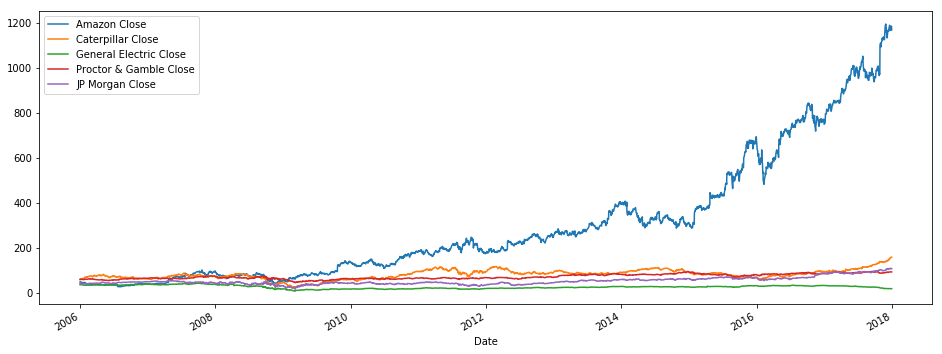

In [52]:
#Set 'Date' as the index for the dataframes
df19 = AMZN.set_index('Date')
df20 = CAT.set_index('Date')
df21 = GE.set_index('Date')
df22 = PG.set_index('Date')
df23 = JPM.set_index('Date')

#Plot the variation in closing price
fig = plt.figure()
df19['Close'].plot(label = 'Amazon Close', figsize = (16,6))
df20['Close'].plot(label = 'Caterpillar Close' , figsize = (16,6))
df21['Close'].plot(label = 'General Electric Close' , figsize = (16,6))
df22['Close'].plot(label = 'Proctor & Gamble Close' , figsize = (16,6))
df23['Close'].plot(label = 'JP Morgan Close' , figsize = (16,6))
plt.legend()

It can be seen that Amazon is clearly the best performing of the 5 stocks with an excellent growth in value over the years.

##### What is the percentage of trading days when the stock price of CISCO went up?

In [53]:
#Each day the closing price can be greater than, lower than or equal to the opening price
AMZN['Return'] = AMZN['Close'] - AMZN['Open']

#On how many days is closing price greater than opening price
a = AMZN[AMZN['Return'] >0].count()[0]

#Total number of transaction days for the Amazon stock
t = len(AMZN)

#Percentage of days when stock went up
p = a/t*100

print('For {} % of trading days, the stock Close value of Amazon was greater than the Open value.'.format(p.round(2)))

For 50.18 % of trading days, the stock Close value of Amazon was greater than the Open value.


In [54]:
#Each day the closing price can be greater than, lower than or equal to the opening price
CAT['Return'] = CAT['Close'] - CAT['Open']

#On how many days is closing price greater than opening price
a = CAT[CAT['Return'] >0].count()[0]

#Total number of transaction days for the Caterpillar stock
t = len(CAT)

#Percentage of days when stock went up
p = a/t*100

print('For {} % of trading days, the stock Close value of Caterpillar was greater than the Open value.'.format(p.round(2)))

For 49.77 % of trading days, the stock Close value of Caterpillar was greater than the Open value.


In [55]:
#Each day the closing price can be greater than, lower than or equal to the opening price
GE['Return'] = GE['Close'] - GE['Open']

#On how many days is closing price greater than opening price
a = GE[GE['Return'] >0].count()[0]

#Total number of transaction days for the Caterpillar stock
t = len(GE)

#Percentage of days when stock went up
p = a/t*100

print('For {} % of trading days, the stock Close value of Caterpillar was greater than the Open value.'.format(p.round(2)))

For 47.05 % of trading days, the stock Close value of Caterpillar was greater than the Open value.


In [56]:
#Each day the closing price can be greater than, lower than or equal to the opening price
PG['Return'] = PG['Close'] - PG['Open']

#On how many days is closing price greater than opening price
a = PG[PG['Return'] >0].count()[0]

#Total number of transaction days for the Proctor & Gamble stock
t = len(PG)

#Percentage of days when stock went up
p = a/t*100

print('For {} % of trading days, the stock Close value of Proctor & Gamble was greater than the Open value.'.format(p.round(2)))

For 52.28 % of trading days, the stock Close value of Proctor & Gamble was greater than the Open value.


In [57]:
#Each day the closing price can be greater than, lower than or equal to the opening price
JPM['Return'] = JPM['Close'] - JPM['Open']

#On how many days is closing price greater than opening price
a = JPM[JPM['Return'] >0].count()[0]

#Total number of transaction days for the JP Morgan stock
t = len(JPM)

#Percentage of days when stock went up
p = a/t*100

print('For {} % of trading days, the stock Close value of JP Morgan was greater than the Open value.'.format(p.round(2)))

For 51.56 % of trading days, the stock Close value of JP Morgan was greater than the Open value.


For more than half of the total trading days; Amazon, Proctor & Gamble and JP Morgan have their Close value higher than their Open value. This implies a good performance in the stock market.

##### What is the highest single day absolute gain achieved by the 5 stocks?

In [58]:
AMZN[AMZN['Return'] == AMZN['Return'].max()][['Return','Date']]

,Return,Date
2975,42.81,2017-10-27


In [59]:
CAT[CAT['Return'] == CAT['Return'].max()][['Return','Date']]

,Return,Date
699,4.48,2008-10-13


In [60]:
GE[GE['Return'] == GE['Return'].max()][['Return','Date']]

,Return,Date
680,2.89,2008-09-16


In [61]:
PG[PG['Return'] == PG['Return'].max()][['Return','Date']]

,Return,Date
710,4.83,2008-10-28


In [62]:
JPM[JPM['Return'] == JPM['Return'].max()][['Return','Date']]

,Return,Date
688,7.69,2008-09-26


Of the 5 stocks, Amazon has had the highest single day gain (42.81)

##### Variation in volume of shares traded over time

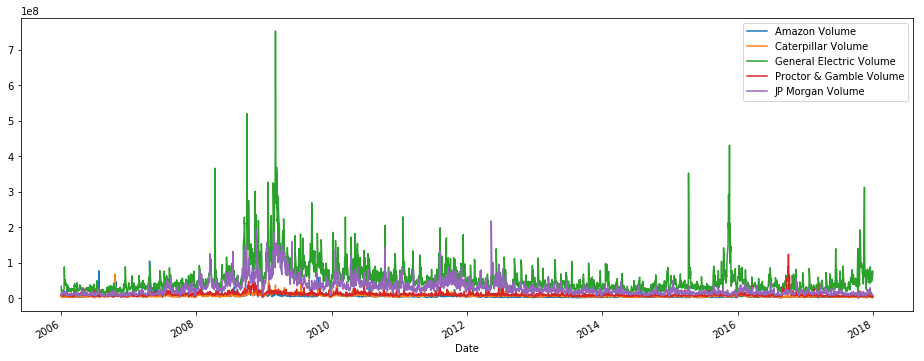

In [63]:
fig = plt.figure()
df19['Volume'].plot(label = 'Amazon Volume', figsize = (16,6))
df20['Volume'].plot(label = 'Caterpillar Volume' , figsize = (16,6))
df21['Volume'].plot(label = 'General Electric Volume' , figsize = (16,6))
df22['Volume'].plot(label = 'Proctor & Gamble Volume' , figsize = (16,6))
df23['Volume'].plot(label = 'JP Morgan Volume' , figsize = (16,6))
plt.legend()

General Electric has the highest volume of shares being traded. One reason could be that the close/face value of the share is the lowest among the 5 companies. Hence more people are able to purchase the stock, unlike Amazon whose value is so high that most people can't afford it.

##### Variation in daily return of the 5 stocks over time

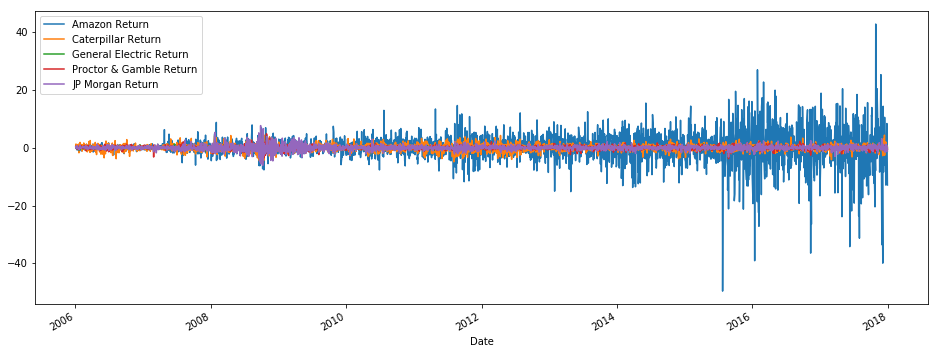

In [64]:
fig = plt.figure()
#Calculate the Return for all 5 stocks
df19['Return'] = df19['Close'] - df19['Open']
df20['Return'] = df20['Close'] - df20['Open']
df21['Return'] = df21['Close'] - df21['Open']
df22['Return'] = df22['Close'] - df22['Open']
df23['Return'] = df23['Close'] - df23['Open']

#Plot the daily return for all 5 stocks
df19['Return'].plot(label = 'Amazon Return', figsize = (16,6))
df20['Return'].plot(label = 'Caterpillar Return' , figsize = (16,6))
df21['Return'].plot(label = 'General Electric Return' , figsize = (16,6))
df22['Return'].plot(label = 'Proctor & Gamble Return' , figsize = (16,6))
df23['Return'].plot(label = 'JP Morgan Return' , figsize = (16,6))
plt.legend()

Amazon displays the most variation / volatility in daily returns. Hence for an investor it represents a high risk high reward stock.

##### 10 day, 20 day and 30 day moving averages for the 5 stocks

In [65]:
#Calculate the 10,20 and 30 day moving averages for all 5 stocks
df19['10 day Moving Avg'] = df19['Close'].rolling(window = 10).mean()
df19['20 day Moving Avg'] = df19['Close'].rolling(window = 20).mean()
df19['30 day Moving Avg'] = df19['Close'].rolling(window = 30).mean()

df20['10 day Moving Avg'] = df20['Close'].rolling(window = 10).mean()
df20['20 day Moving Avg'] = df20['Close'].rolling(window = 20).mean()
df20['30 day Moving Avg'] = df20['Close'].rolling(window = 30).mean()

df21['10 day Moving Avg'] = df21['Close'].rolling(window = 10).mean()
df21['20 day Moving Avg'] = df21['Close'].rolling(window = 20).mean()
df21['30 day Moving Avg'] = df21['Close'].rolling(window = 30).mean()

df22['10 day Moving Avg'] = df22['Close'].rolling(window = 10).mean()
df22['20 day Moving Avg'] = df22['Close'].rolling(window = 20).mean()
df22['30 day Moving Avg'] = df22['Close'].rolling(window = 30).mean()

df23['10 day Moving Avg'] = df23['Close'].rolling(window = 10).mean()
df23['20 day Moving Avg'] = df23['Close'].rolling(window = 20).mean()
df23['30 day Moving Avg'] = df23['Close'].rolling(window = 30).mean()

10 day Moving Average

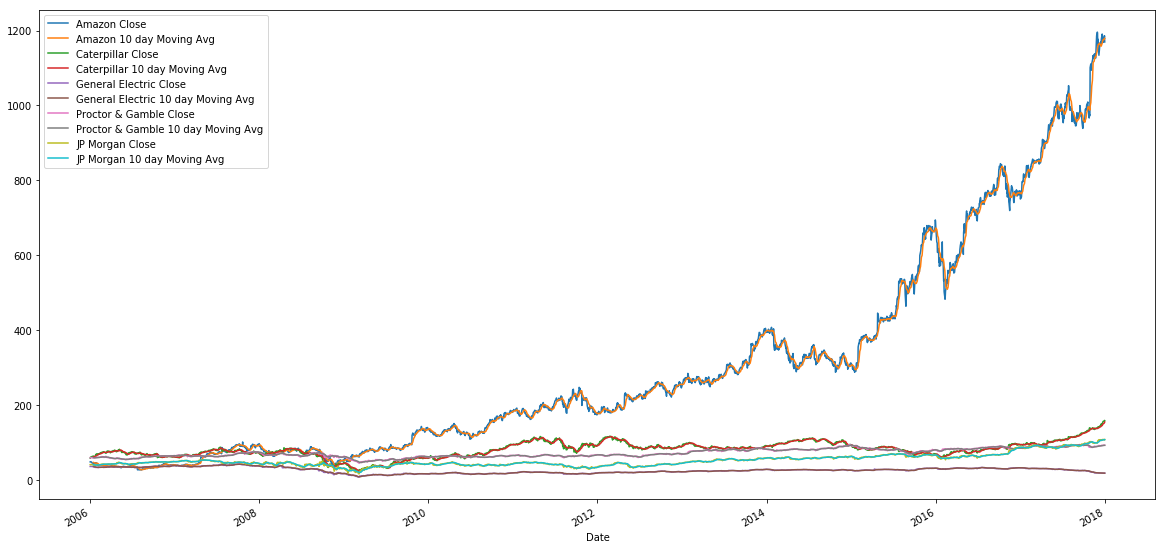

In [66]:
#Display the 10 day moving average with associated Close for all 5 stocks
fig = plt.figure()
df19['Close'].plot(label = 'Amazon Close', figsize = (20,10))
df19['10 day Moving Avg'].plot(label = 'Amazon 10 day Moving Avg', figsize = (20,10))
df20['Close'].plot(label = 'Caterpillar Close', figsize = (20,10))
df20['10 day Moving Avg'].plot(label = 'Caterpillar 10 day Moving Avg', figsize = (20,10))
df21['Close'].plot(label = 'General Electric Close', figsize = (20,10))
df21['10 day Moving Avg'].plot(label = 'General Electric 10 day Moving Avg', figsize = (20,10))
df22['Close'].plot(label = 'Proctor & Gamble Close', figsize = (20,10))
df22['10 day Moving Avg'].plot(label = 'Proctor & Gamble 10 day Moving Avg', figsize = (20,10))
df23['Close'].plot(label = 'JP Morgan Close', figsize = (20,10))
df23['10 day Moving Avg'].plot(label = 'JP Morgan 10 day Moving Avg', figsize = (20,10))
plt.legend()

20 day Moving Average

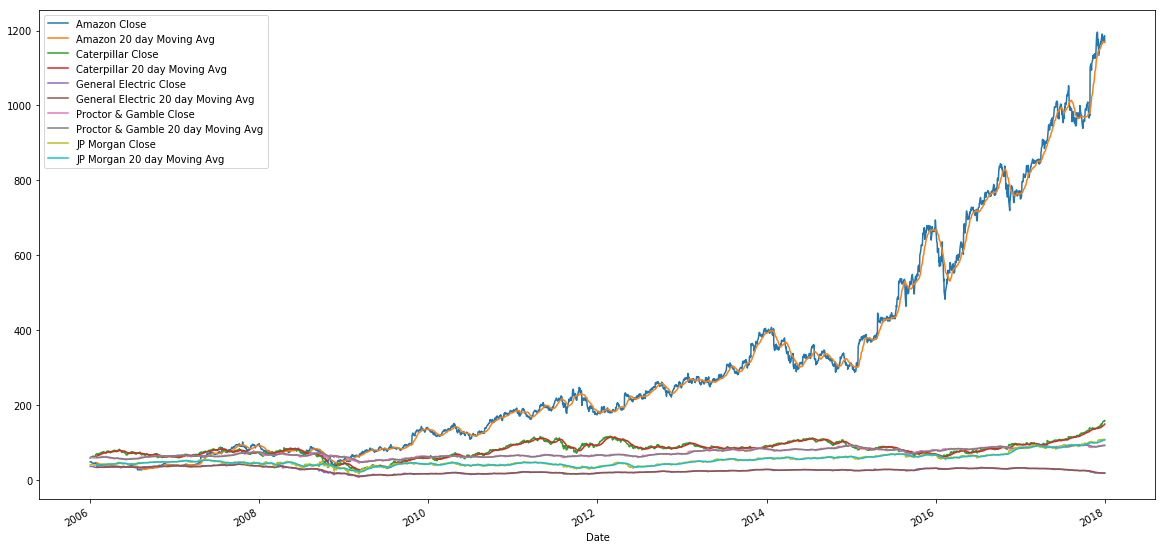

In [67]:
#Display the 20 day moving average with associated Close for all 5 stocks
fig = plt.figure()
df19['Close'].plot(label = 'Amazon Close', figsize = (20,10))
df19['20 day Moving Avg'].plot(label = 'Amazon 20 day Moving Avg', figsize = (20,10))
df20['Close'].plot(label = 'Caterpillar Close', figsize = (20,10))
df20['20 day Moving Avg'].plot(label = 'Caterpillar 20 day Moving Avg', figsize = (20,10))
df21['Close'].plot(label = 'General Electric Close', figsize = (20,10))
df21['20 day Moving Avg'].plot(label = 'General Electric 20 day Moving Avg', figsize = (20,10))
df22['Close'].plot(label = 'Proctor & Gamble Close', figsize = (20,10))
df22['20 day Moving Avg'].plot(label = 'Proctor & Gamble 20 day Moving Avg', figsize = (20,10))
df23['Close'].plot(label = 'JP Morgan Close', figsize = (20,10))
df23['20 day Moving Avg'].plot(label = 'JP Morgan 20 day Moving Avg', figsize = (20,10))
plt.legend()

30 day Moving Average

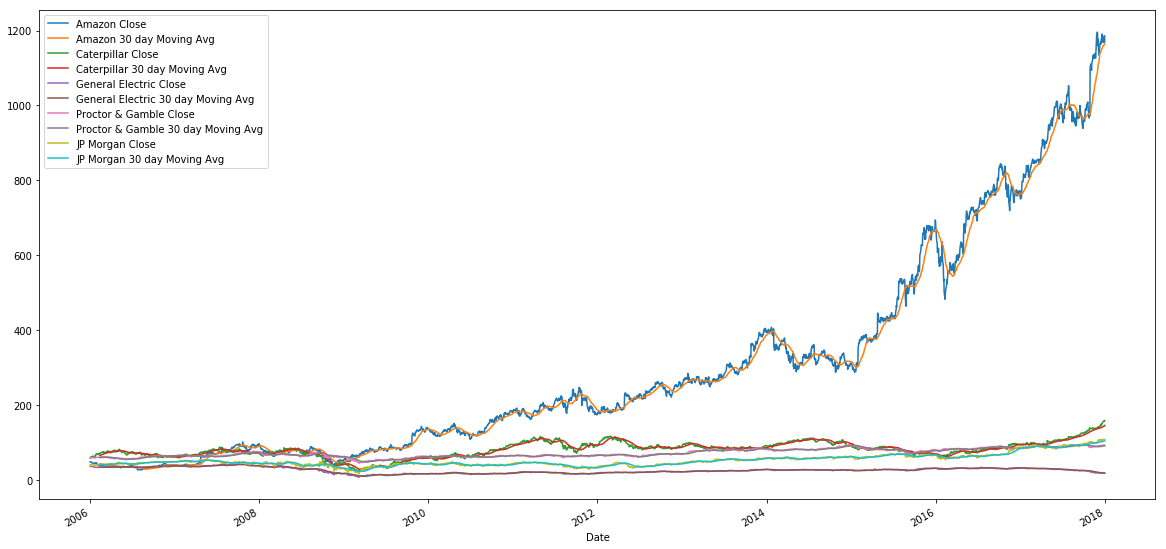

In [68]:
#Display the 20 day moving average with associated Close for all 5 stocks
fig = plt.figure()
df19['Close'].plot(label = 'Amazon Close', figsize = (20,10))
df19['30 day Moving Avg'].plot(label = 'Amazon 30 day Moving Avg', figsize = (20,10))
df20['Close'].plot(label = 'Caterpillar Close', figsize = (20,10))
df20['30 day Moving Avg'].plot(label = 'Caterpillar 30 day Moving Avg', figsize = (20,10))
df21['Close'].plot(label = 'General Electric Close', figsize = (20,10))
df21['30 day Moving Avg'].plot(label = 'General Electric 30 day Moving Avg', figsize = (20,10))
df22['Close'].plot(label = 'Proctor & Gamble Close', figsize = (20,10))
df22['30 day Moving Avg'].plot(label = 'Proctor & Gamble 30 day Moving Avg', figsize = (20,10))
df23['Close'].plot(label = 'JP Morgan Close', figsize = (20,10))
df23['30 day Moving Avg'].plot(label = 'JP Morgan 30 day Moving Avg', figsize = (20,10))
plt.legend()